In [1]:
import numpy as np # Linear Algebra
import pandas as pd # Data Processing

# Libraries for Data Visualization\
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded=files.upload()

Saving glass.csv to glass.csv


In [3]:
df=pd.read_csv("glass.csv")

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(213, 10)

In [10]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# **`Data Visualization`**

### **`Countplot for Types of Glass`**

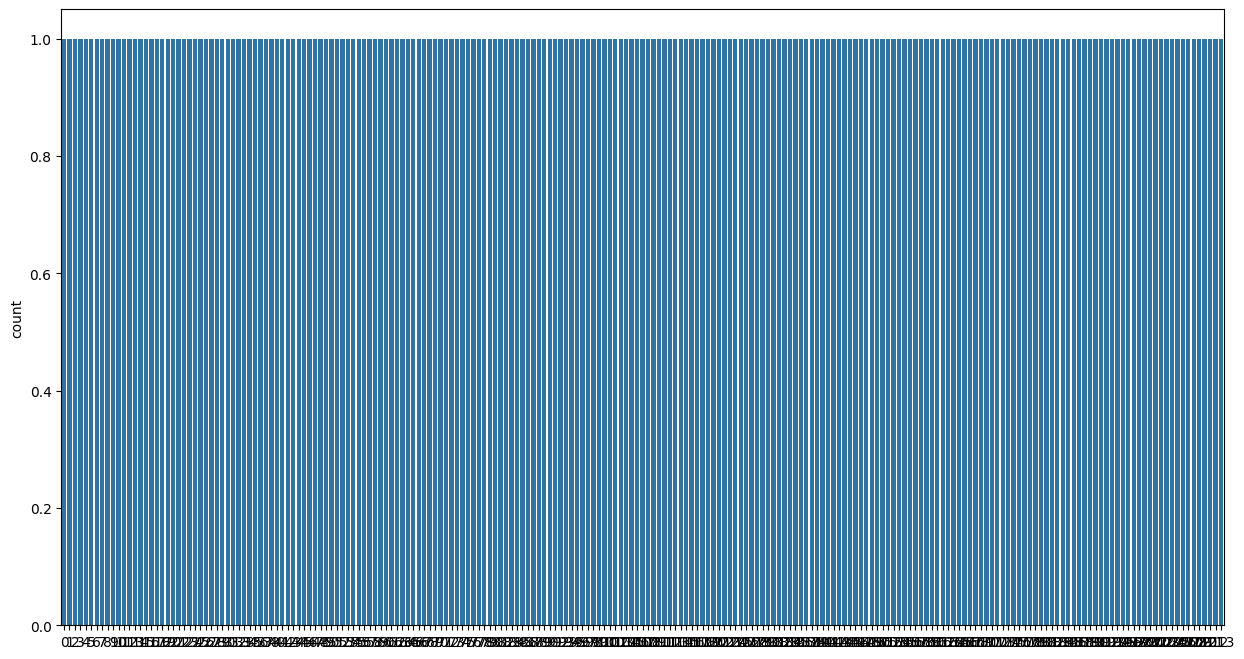

In [12]:
fig,ax=plt.subplots(figsize=(15,8))
sns.countplot(df['Type'],ax=ax);

> #### **`Univariate analysis `**
>> #### **`Distribution and boxplots for refractive index and various composition of glass`**

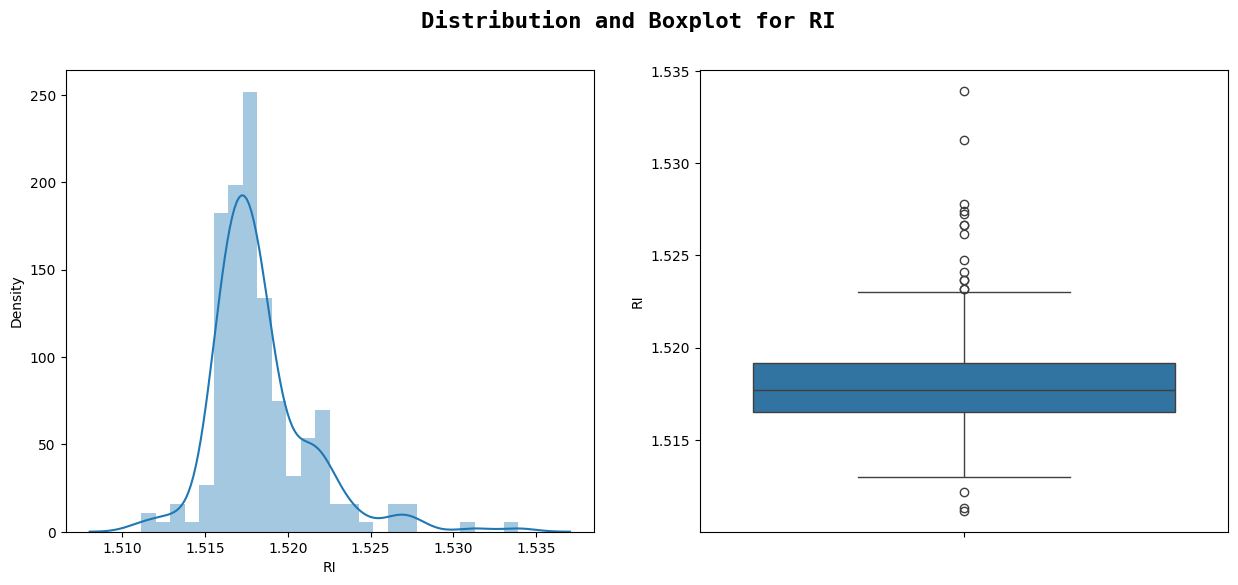

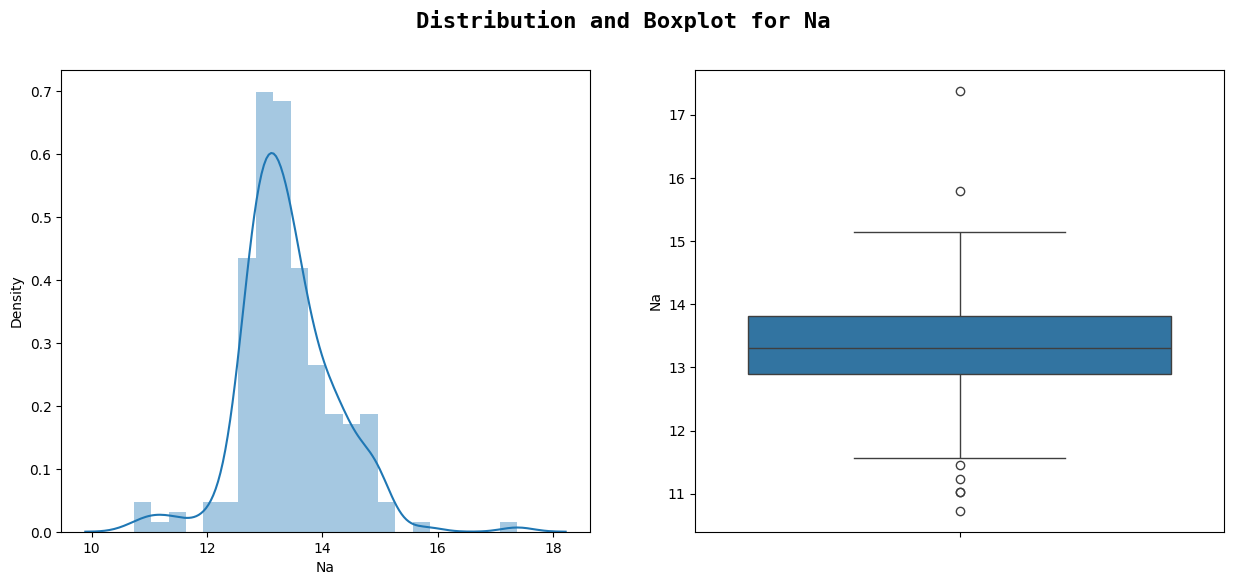

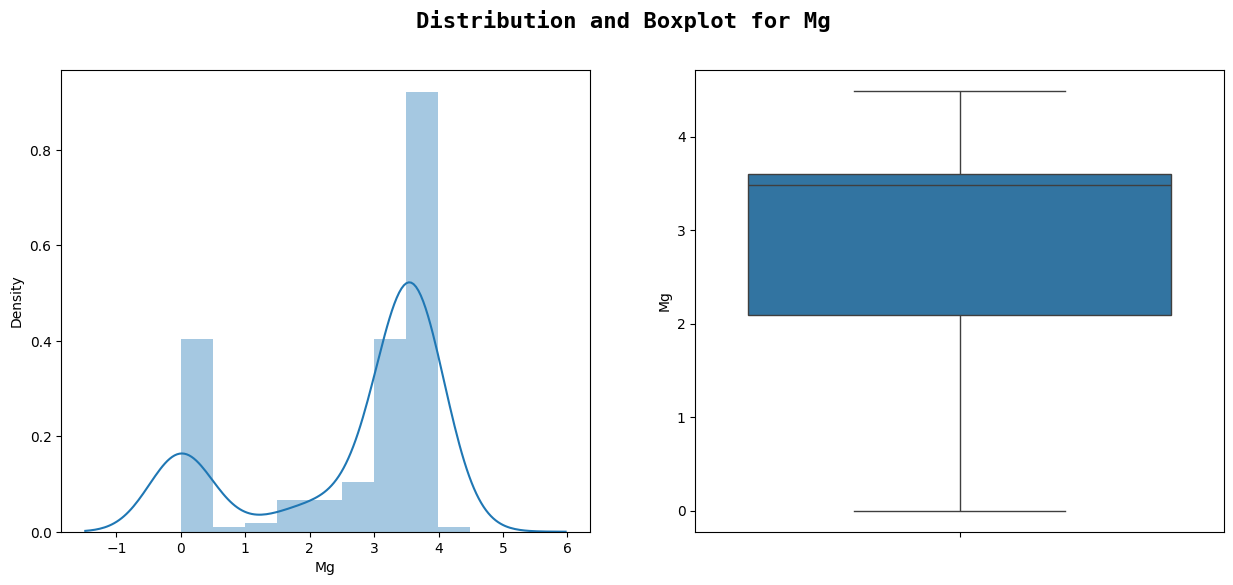

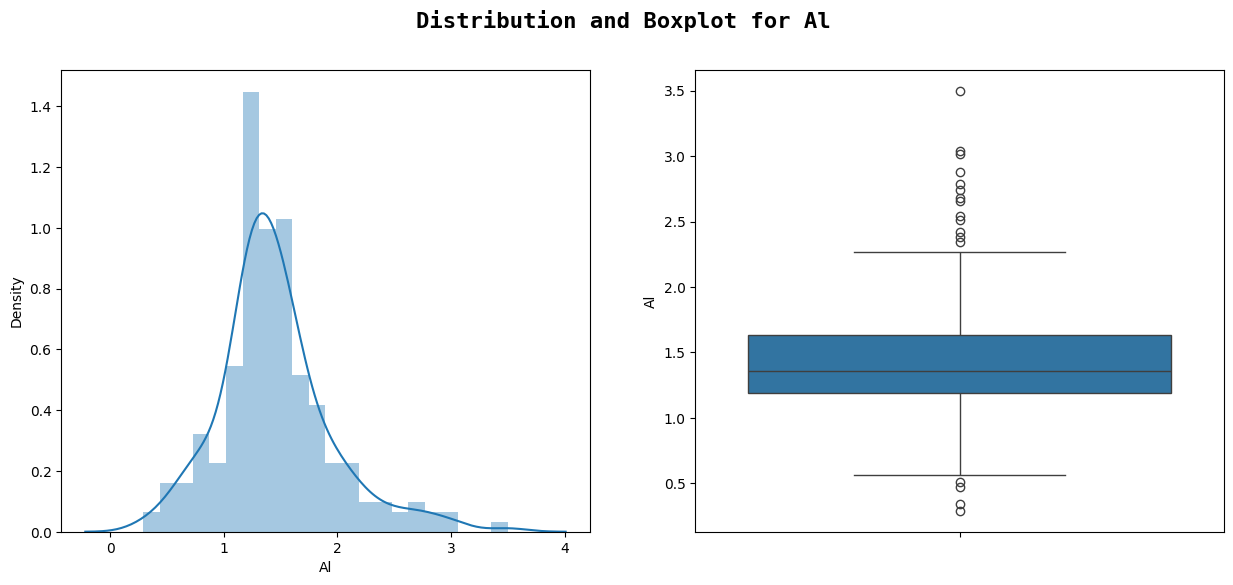

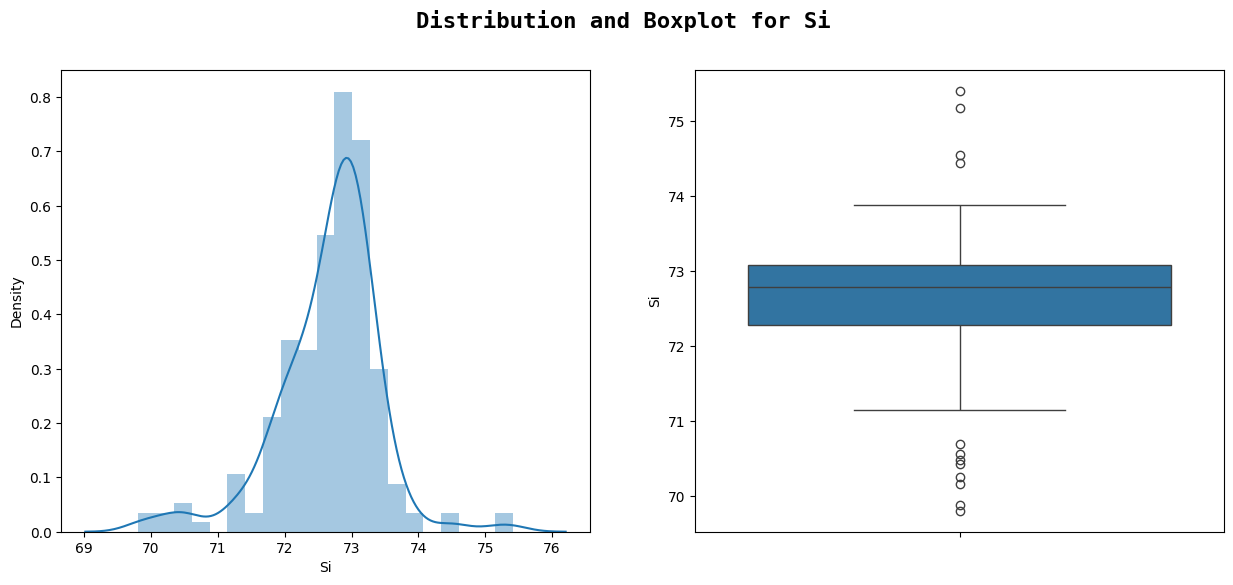

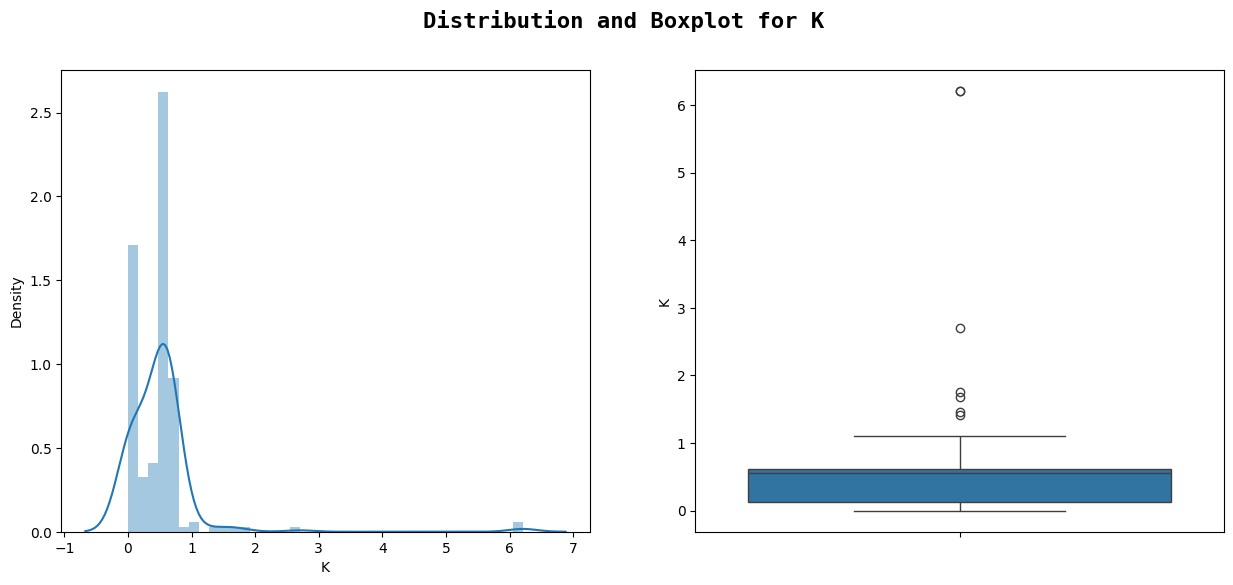

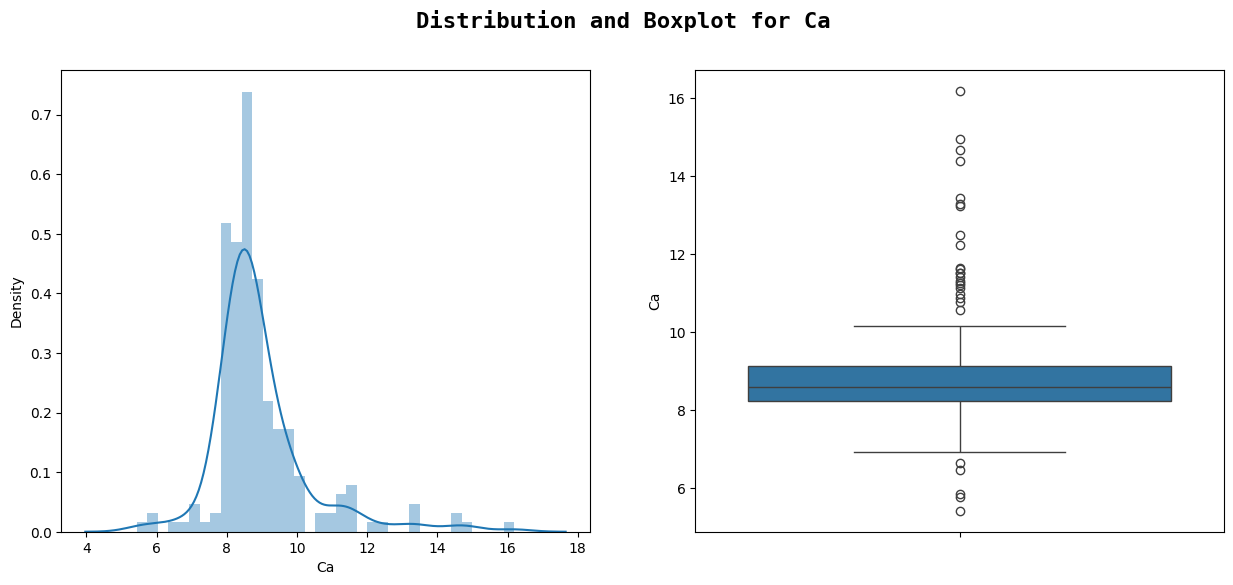

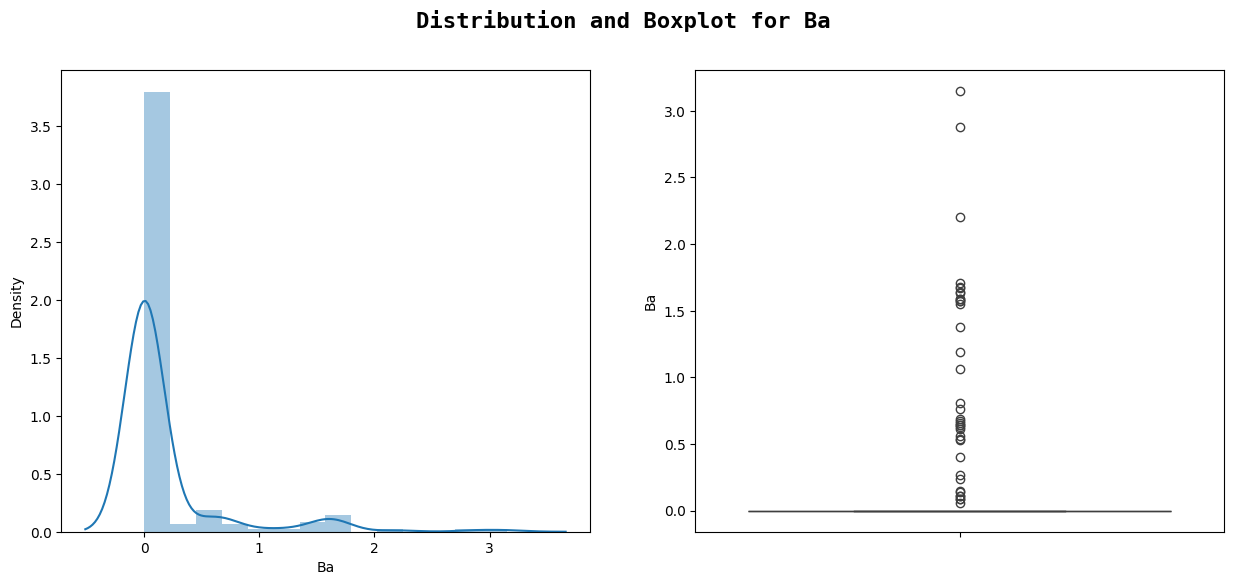

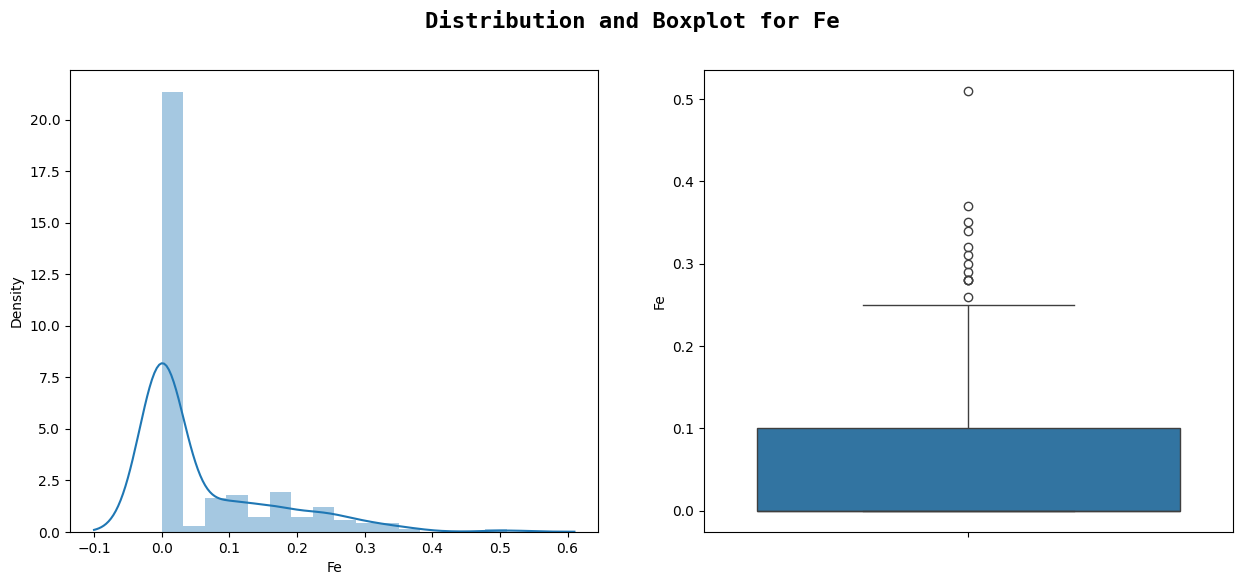

In [13]:
features=df.columns[:-1]
for feature in features:
  fig=plt.figure(figsize=(15,6))

  fig.add_subplot(1,2,1)
  sns.distplot(df[feature])
  fig.suptitle('Distribution and Boxplot for {}'.format(feature),fontsize=16,family='monospace',fontweight='bold')
  #plt.title('Density distribution for', feature)

  fig.add_subplot(1,2,2)
  sns.boxplot(df[feature])
  #plt.title('Boxplot for',feature)

## **`Correlation between features`**

<Axes: >

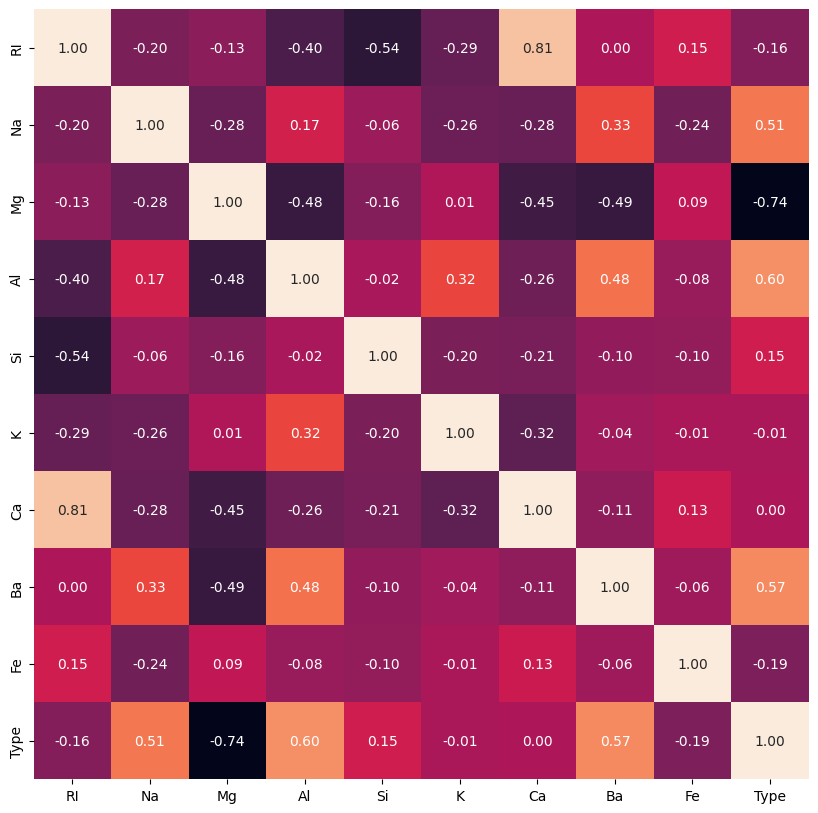

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cbar=False)

>> #### **`There is fairly strong positive correlation between glass types with Na, Al and Ba.`**

>> #### **`There is negative correlation between glass types and Mg`**.

## **`Pairplots`**

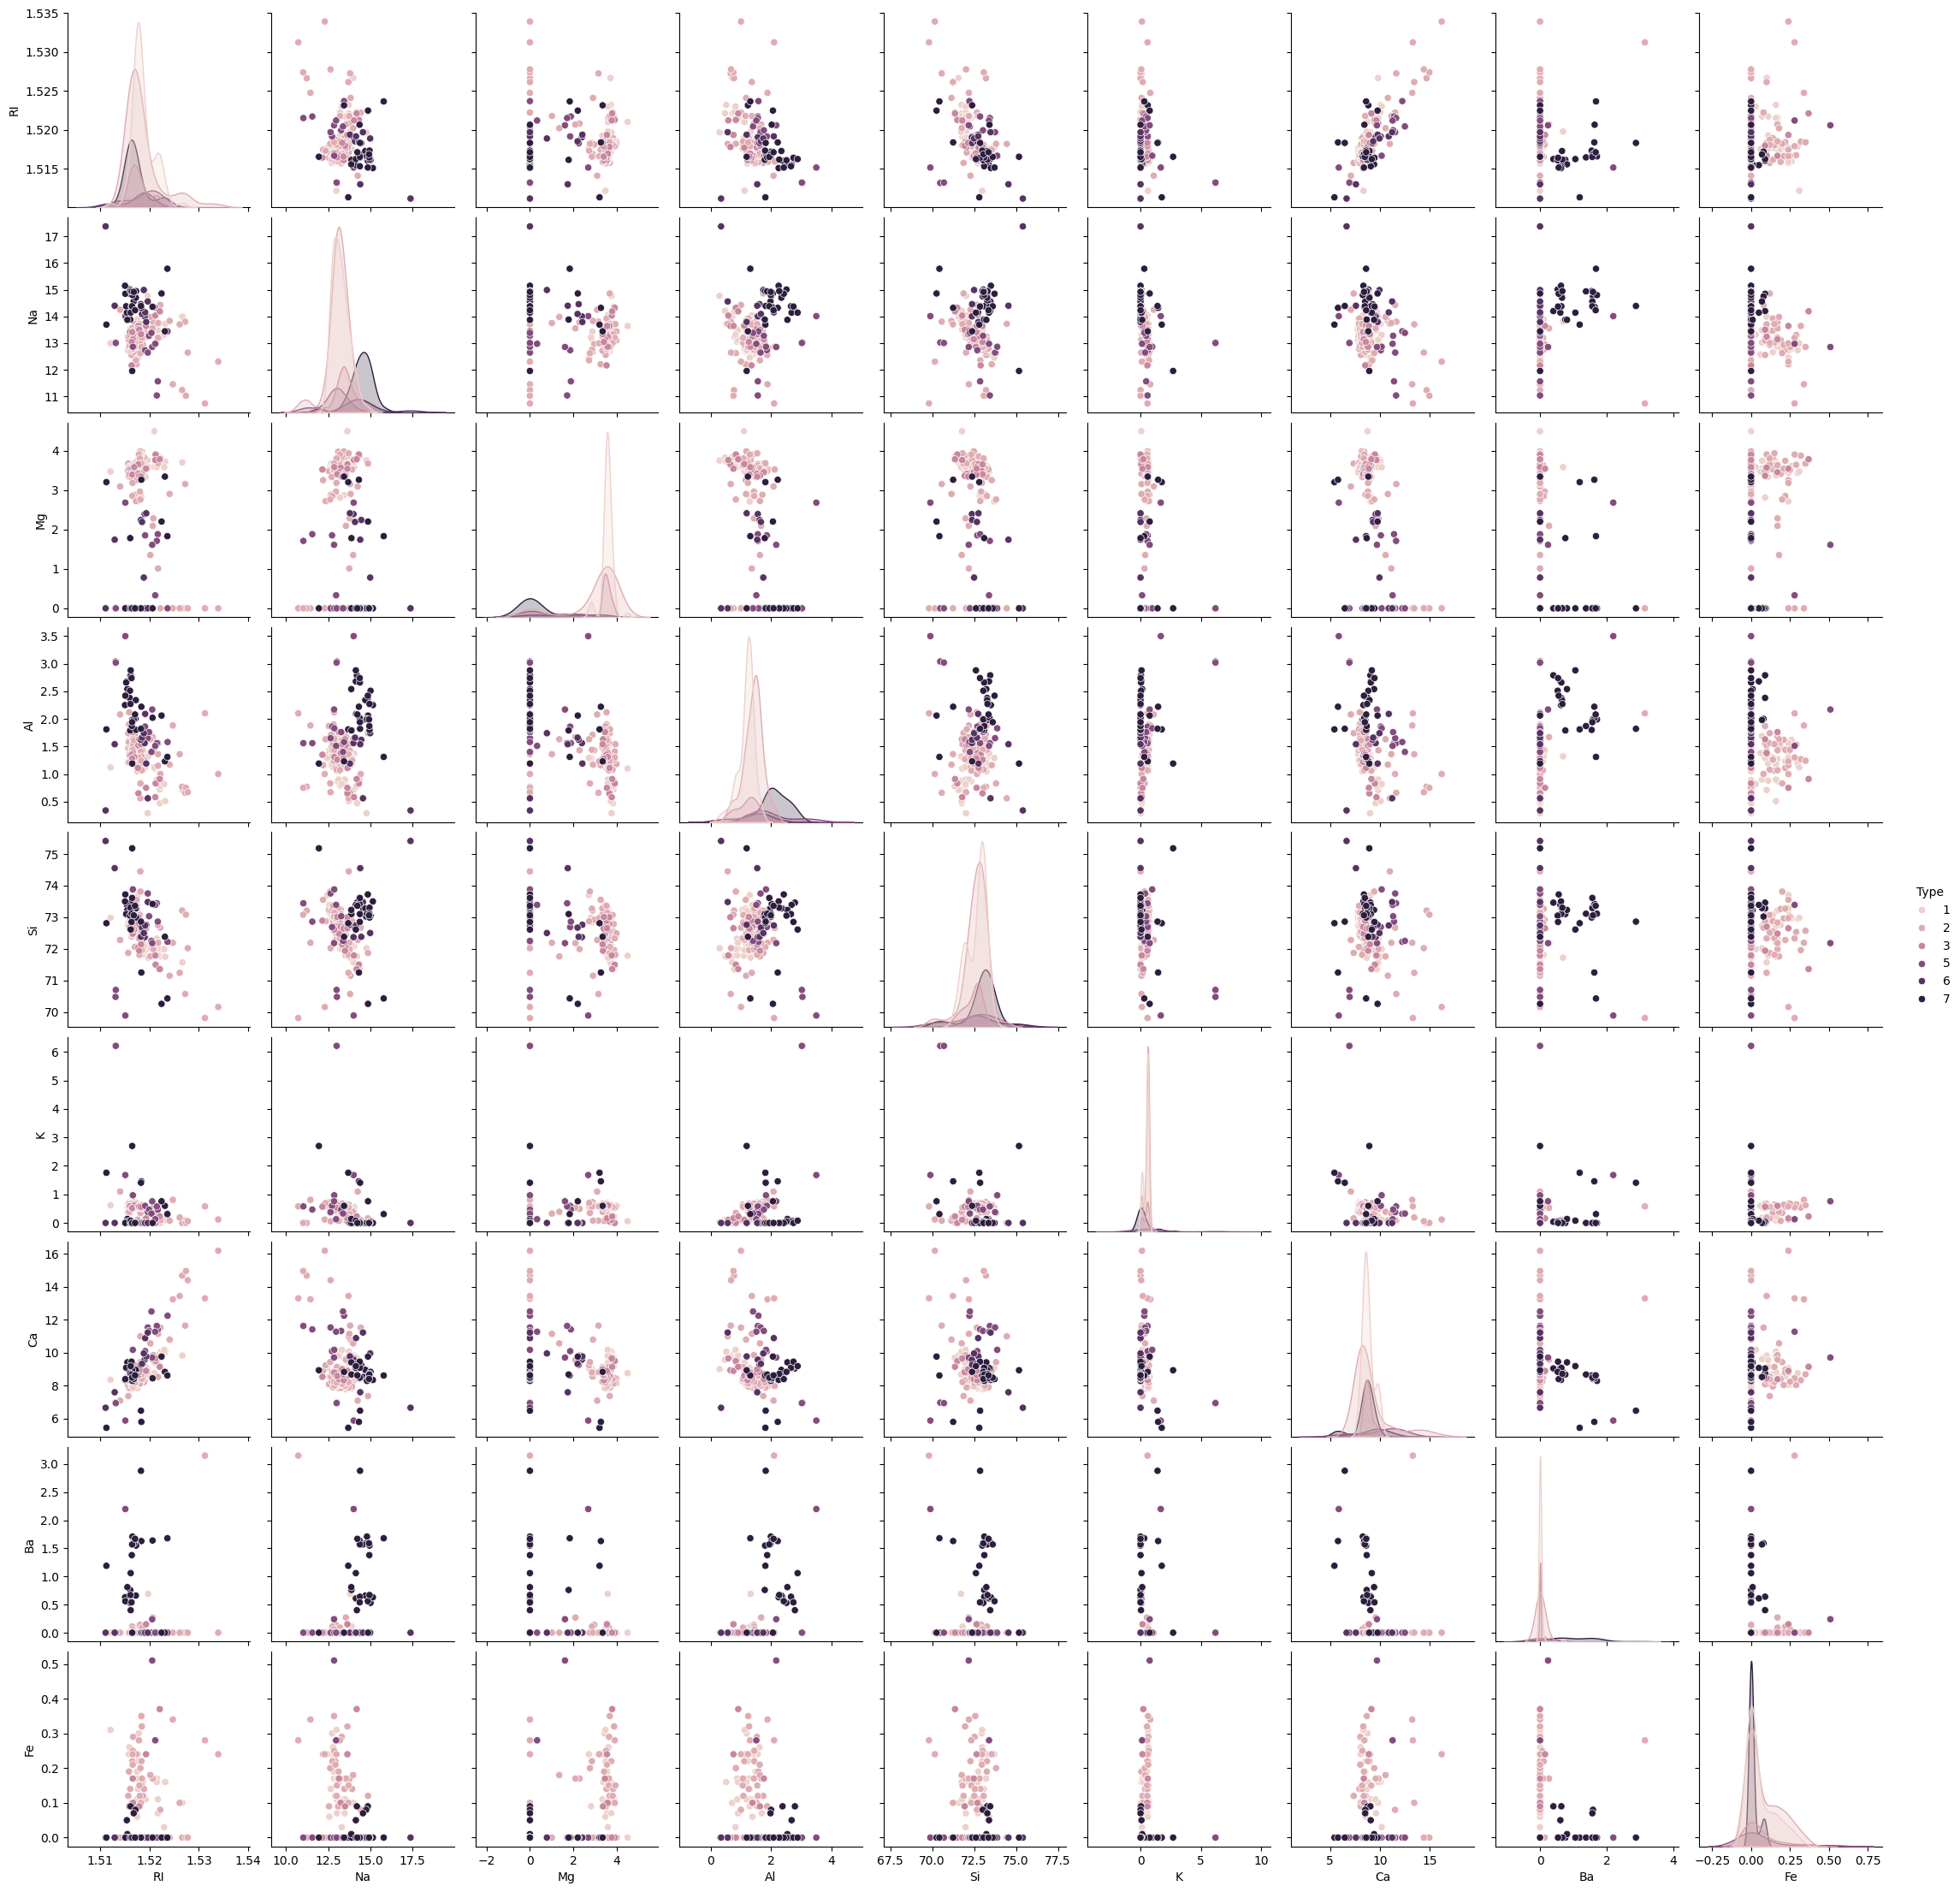

In [15]:
sns.pairplot(df,hue='Type')
plt.show()

In [16]:
scaler=StandardScaler()
scaler.fit(df.drop('Type',axis=1))
scaled_df=scaler.transform(df.drop('Type',axis=1))
scaled_df

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [17]:
df_new=pd.DataFrame(scaled_df,columns=df.columns[:-1])
df_new

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


> ## **`Data Preprocessing`**

>> **`Train-test split and K-Fold Cross Validation`**

In [18]:
x=df_new
y=df.iloc[:,-1]

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
print('Shape of x_train: ',x_train.shape)
print('Shape of x_test: ',x_test.shape)
print('Shape of y_train: ' ,y_train.shape)
print('Shape of y_test:' ,y_test.shape)

Shape of x_train:  (149, 9)
Shape of x_test:  (64, 9)
Shape of y_train:  (149,)
Shape of y_test: (64,)


In [21]:
num_folds=10
kfold=KFold(n_splits=10)

> **`Let's take random K-value.`**


>> **`K = 10, where K indicates the count of the nearest neighbors.`**

In [22]:
model=KNeighborsClassifier(n_neighbors=10)
results=cross_val_score(model,x,y,cv=kfold)

In [23]:
print('Accuracy with K=10 and KFold validation is',np.round(results.mean(),4))

Accuracy with K=10 and KFold validation is 0.4236


>>> ### **`When train-test split is used`**

In [24]:
model=KNeighborsClassifier(n_neighbors=10)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)
print('Training accuracy score: %.3f' %model.score(x_train,y_train))
print('Testing accuracy score %.3f' %model.score(x_test,y_test))
print('Accuracy of model with K=10 using train_test_split',np.round(accuracy_score(y_test,y_pred),4))

Training accuracy score: 0.678
Testing accuracy score 0.656
Accuracy of model with K=10 using train_test_split 0.6562


># **`GridSearchCV used for tuning model parameters and selecting the best estimator with optimal score.`**

In [25]:
n_neighbors=np.array(range(1,50))
param_grid=dict(n_neighbors=n_neighbors)

In [26]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=kfold)
grid.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [27]:
print('Accuracy of the model is:',grid.best_score_)
print(grid.best_params_)

Accuracy of the model is: 0.6723809523809524
{'n_neighbors': 1}


**`Lower value of K can overfit the data. If K=1, the instance will be assigned to each class as it's single nearest neighbours.`**

**`A very low value for K such as K=1 or K=2, can be noisy and lead to the effects of outliers in the model.`**

In [28]:
n_neighbors=np.array(range(3,50,3))
param_grid=dict(n_neighbors=n_neighbors)
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=kfold)
grid.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48])})

In [29]:
print('Accuracy of the model is:',np.round(grid.best_score_,4))
print(grid.best_params_)

Accuracy of the model is: 0.6519
{'n_neighbors': 3}


In [30]:
k_range=range(3,40,3)

k_scores=[]
error_rate=[]

for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,x_train,y_train,scoring='accuracy',cv=kfold)
  k_scores.append(scores.mean())

pd.Series(k_scores).sort_values(ascending=False)

0     0.651905
2     0.625238
4     0.610476
3     0.598095
1     0.597619
5     0.590952
6     0.583810
7     0.576667
8     0.562381
9     0.561905
10    0.556190
12    0.489048
11    0.488571
dtype: float64

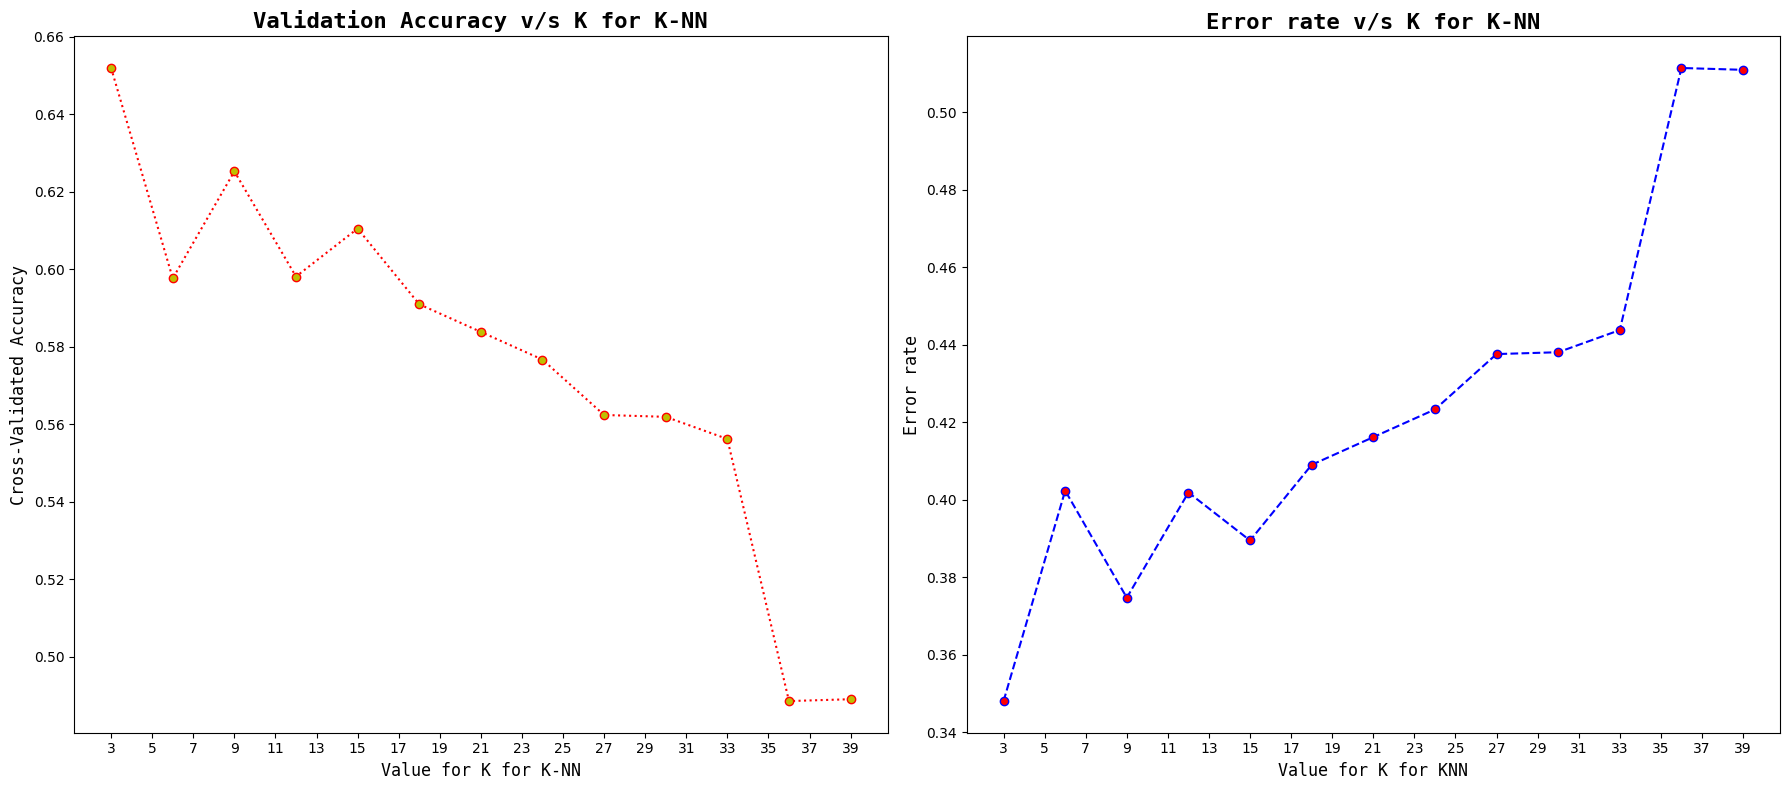

In [31]:
k_range=range(3,40,3)

k_scores=[]
error_rate=[]

for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,x_train,y_train,scoring='accuracy',cv=kfold)
  k_scores.append(scores.mean())
  error_rate.append((1-scores.mean()))

plt.figure(figsize=(18,8))

plt.subplot(1,2,1)

plt.plot(k_range,k_scores,'o:r',markerfacecolor='y')
plt.title('Validation Accuracy v/s K for K-NN',fontsize=16,family='monospace',fontweight='bold')
plt.xlabel('Value for K for K-NN',fontsize=12,family='monospace')
plt.ylabel('Cross-Validated Accuracy',fontsize=12,family='monospace')
plt.xticks(list(range(3,40,2)))

plt.subplot(1,2,2)
plt.plot(k_range,error_rate,'b--o',markerfacecolor='r')
plt.title('Error rate v/s K for K-NN',fontsize=16,family='monospace',fontweight='bold')
plt.xlabel('Value for K for KNN',fontsize=12,family='monospace')
plt.ylabel('Error rate',fontsize=12,family='monospace')
plt.xticks(list(range(3,40,2)))

plt.tight_layout()
plt.show()

In [32]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)
result1=classification_report(y_test,y_pred)
print('Accuracy with k=3 using train_test_split',np.round(accuracy_score(y_test,y_pred),4))
print("\nClassification Report\n",result1)

Accuracy with k=3 using train_test_split 0.6875

Classification Report
               precision    recall  f1-score   support

           1       0.62      0.89      0.73        18
           2       0.67      0.67      0.67        24
           3       0.00      0.00      0.00         4
           5       0.50      0.50      0.50         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.69        64
   macro avg       0.63      0.57      0.59        64
weighted avg       0.67      0.69      0.67        64



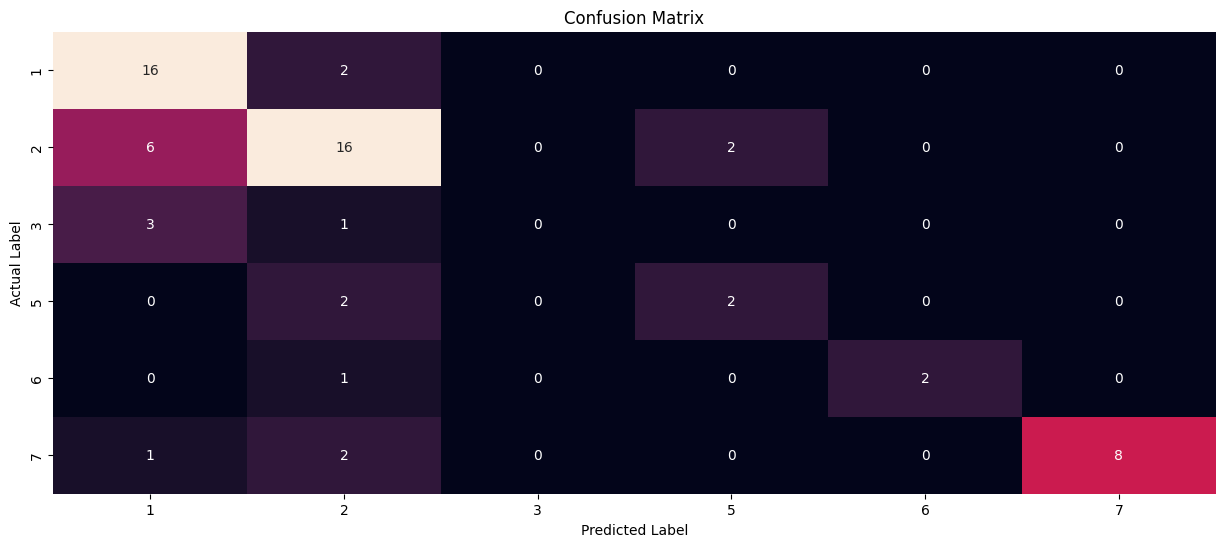

In [33]:
cm_df = confusion_matrix(y_test, y_pred)
class_label = ['1','2','3','5','6','7'] #class 4 is absent in dataset

df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
plt.figure(figsize=(15,6))
sns.heatmap(df_cm, annot = True, fmt = "d",cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()